In [2]:
# Packages einlesen
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Read the JSON data File and transform it into a DataFrame

with open('/Users/paulahofmann/Documents/Coding/Online-Review/SelectingData/Beauty & Care/Beauty&Care.json', 'r') as file:
    # Parse the JSON data into a Python object
    data = json.loads(file.read())


df = pd.DataFrame(data)
print(df.head(3))
   

   rating                          title  \
0     5.0  Easy to store and easy to use   
1     2.0                     Smells odd   
2     5.0             Very nice product.   

                                                text images        asin  \
0  Just threw away 2 ladies electric shavers. 1 b...     []  B0018A32XS   
1  It’s okay not the greatest and doesn’t have an...     []  B00EJDG7XI   
2          Sharp product. Easy to use and well made.     []  B0018A32XS   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B0018A32XS  AHZ6XMOLEWA67S3TX7IWEXXGWSOA  1467134907000             1   
1  B0BLGN9N39  AFSCQMP2EPYLGJN7OBTMEXCBE2OQ  1609008588813             0   
2  B0018A32XS  AHACLF2COQQE2V33ZFXQ7THZOJ2Q  1628855019775             0   

   verified_purchase  
0               True  
1               True  
2               True  


In [27]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')


In [28]:
# Count number of unique parent_asin in the DataFrame
unique_values = df['parent_asin'].unique()
print(unique_values)

['B0018A32XS' 'B0BLGN9N39']


In [31]:
# Split the data into two DataFrames based on the 'asin' column
data_utilitarian_filter = df[df['parent_asin'] == 'B0018A32XS']
data_hedonic = df[df['parent_asin'] == 'B0BLGN9N39']

In [32]:
# Summarize overall rating for each product
print(data_utilitarian_filter['rating'].describe())
print(data_hedonic['rating'].describe())

count    11388.000000
mean         4.004566
std          1.438159
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64
count    270.000000
mean       3.270370
std        1.582035
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


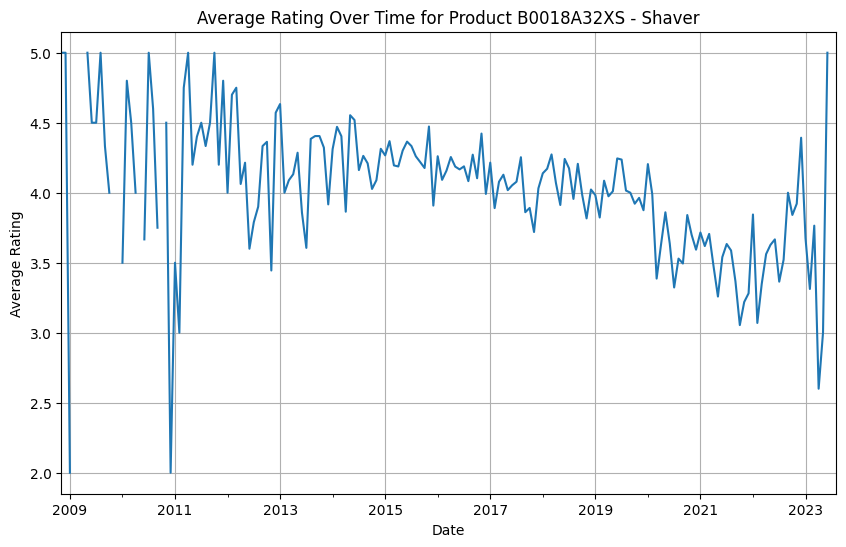

In [33]:
# Group the data by timestamp and calculate the average rating for each time period
average_rating_over_time = data_utilitarian_filter.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

# Plot the average rating over time
plt.figure(figsize=(10, 6))
average_rating_over_time.plot()
plt.title('Average Rating Over Time for Product B0018A32XS - Shaver')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Text Preprocessing



In [34]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy with lemmatization and lowercasing

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatization and lowercasing
    processed_text = ' '.join([token.lemma_.lower() for token in doc])
    
    return processed_text




In [35]:
# Adding another column, that filters out stop words and punctuation/symbols
import string

# Define a set of stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Function to preprocess text using spaCy
def preprocess_text_stops(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatization, lowercasing, and removal of symbols, punctuation, and stop words
    processed_text = ' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_punct])
    
    return processed_text

In [36]:
# Utilitarian Products
# Using Function to preprocess text using spaCy

# Apply the preprocessing function to the "text" column
data_utilitarian_filter['text_cleaned'] = data_utilitarian_filter['text'].apply(preprocess_text)

# Apply the preprocessing function to the "title" column
data_utilitarian_filter['title_cleaned'] = data_utilitarian_filter['title'].apply(preprocess_text)

# Apply the preprocessing function with stopword removal to the "text" column
data_utilitarian_filter['text_cleaned1'] = data_utilitarian_filter['text'].apply(preprocess_text_stops)

# Apply the preprocessing function with stopword removal to the "title" column
data_utilitarian_filter['title_cleaned1'] = data_utilitarian_filter['title'].apply(preprocess_text_stops)

# Display the DataFrame with the processed text
print(data_utilitarian_filter[['text', 'text_cleaned', 'title', 'title_cleaned']].head())



/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/20385366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian_filter['text_cleaned'] = data_utilitarian_filter['text'].apply(preprocess_text)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/20385366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian_filter['title_cleaned'] = data_utilitarian_filter['title'].apply(preprocess_text)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241

                                                text  \
0  Just threw away 2 ladies electric shavers. 1 b...   
2          Sharp product. Easy to use and well made.   
3  I bought this one for my 13 year old granddaug...   
4  this is an excellent razor.  it caught and rem...   
5  Love this electric razor....it did my research...   

                                        text_cleaned  \
0  just throw away 2 lady electric shaver . 1 bat...   
2        sharp product . easy to use and well make .   
3  i buy this one for my 13 year old granddaughte...   
4  this be an excellent razor .   it catch and re...   
5  love this electric razor .... it do my researc...   

                                title                       title_cleaned  
0       Easy to store and easy to use       easy to store and easy to use  
2                  Very nice product.                 very nice product .  
3            Excellent electric razor            excellent electric razor  
4              very ni

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/20385366.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian_filter['title_cleaned1'] = data_utilitarian_filter['title'].apply(preprocess_text_stops)


In [41]:
# Cleaning rows where text is empty after Text Preprocessing

# Delete rows where 'text_cleaned' column is empty
data_utilitarian_filter.drop(data_utilitarian_filter[data_utilitarian_filter['text_cleaned1'] == ''].index, inplace=True)



/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/813298922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian_filter.drop(data_utilitarian_filter[data_utilitarian_filter['text_cleaned1'] == ''].index, inplace=True)


In [37]:

# Hedonic Products
# Using Function to preprocess text using spaCy

# Apply the preprocessing function to the "text" column
data_hedonic['text_cleaned'] = data_hedonic['text'].apply(preprocess_text)

# Apply the preprocessing function to the "title" column
data_hedonic['title_cleaned'] = data_hedonic['title'].apply(preprocess_text)

# Apply the preprocessing function with stopword removal to the "text" column
data_hedonic['text_cleaned1'] = data_hedonic['text'].apply(preprocess_text_stops)

# Apply the preprocessing function with stopword removal to the "title" column
data_hedonic['title_cleaned1'] = data_hedonic['title'].apply(preprocess_text_stops)



/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/3770337961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hedonic['text_cleaned'] = data_hedonic['text'].apply(preprocess_text)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/3770337961.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hedonic['title_cleaned'] = data_hedonic['title'].apply(preprocess_text)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/3770337961.py:11: SettingWithCopyWarnin

In [42]:
data_hedonic.drop(data_hedonic[data_hedonic['text_cleaned1'] == ''].index, inplace=True)


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/2491146210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hedonic.drop(data_hedonic[data_hedonic['text_cleaned1'] == ''].index, inplace=True)


## Using Sentiment Analysis for Review Text

In [43]:
# Download the pre-trained BERT model and tokenizer
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [44]:
# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
sentiment_model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")


In [45]:
# Build Function to analyze the sentiment of a text

def analyze_sentiment(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # Perform sentiment analysis
    outputs = sentiment_model(**inputs)
    # Get the predicted label
    predicted_label = torch.argmax(outputs.logits)
    return predicted_label.item()  # Return the predicted label as an integer


In [47]:
# Apply the function to the utilitarian product
data_utilitarian_filter['sentiment'] = data_utilitarian_filter['text'].apply(analyze_sentiment)


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/1920315927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian_filter['sentiment'] = data_utilitarian_filter['text'].apply(analyze_sentiment)


In [48]:
data_utilitarian_filter.to_csv('data_utilitarian_filter.csv', index=False)


In [50]:
# Apply the function to the hedonic product
data_hedonic['text_sentiment'] = data_hedonic['text_cleaned1'].apply(analyze_sentiment)
data_hedonic['title_sentiment'] = data_hedonic['title_cleaned1'].apply(analyze_sentiment)


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/3950695646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hedonic['text_sentiment'] = data_hedonic['text_cleaned1'].apply(analyze_sentiment)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_15241/3950695646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hedonic['title_sentiment'] = data_hedonic['title_cleaned1'].apply(analyze_sentiment)


In [51]:
data_hedonic.to_csv('data_hedonic.csv', index=False)


## Topic Modelling

In [25]:
from bertopic import BERTopic

In [27]:
# Importing BErt Topic Model
modelNegative = BERTopic(language="english", nr_topics="auto")

data_utilitarian_filter['text_cleaned1'] = data_utilitarian_filter['text_cleaned1'].fillna('').astype(str)


# Topic Modelling for Hedonic Products
topics, probabilities = modelNegative.fit_transform(data_utilitarian_filter['text_cleaned1'])


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [33]:
# Getting only negative Comments:
dataNegative = data_utilitarian_filter[data_utilitarian_filter.text_sentiment<3]

topics, probabilities = modelNegative.fit_transform(dataNegative['text_cleaned1'])

reviewsNegativeText = dataNegative.text.to_list()

modelNegative.get_topic_freq().head(11)


,Topic,Count
0,0,451
1,-1,390
4,1,78
2,2,40
5,3,23
6,4,21
3,5,12


In [30]:
modelNegative.get_topic(1)


[('work', 0.17938184128795043),
 ('expensive', 0.15326731453794792),
 ('month', 0.1426010963332413),
 ('wish', 0.10679951737809838),
 ('cheap', 0.1067586253042321),
 ('need', 0.10511226304922043),
 ('dislike', 0.0986708493300253),
 ('overprice', 0.0733591839194295),
 ('job', 0.06030037295769011),
 ('money', 0.05823197743867206)]

In [31]:
modelNegative.get_topic(2)


[('expensive', 1.1142568839520837),
 ('little', 0.22867789388745127),
 ('cheap', 0.14895571040471908),
 ('need', 0.14665861208053285),
 ('trust', 0.14123423891708398),
 ('suppose', 0.13564000611888638),
 ('version', 0.11741684243451618),
 ('janky', 0.08567323357904423),
 ('ink', 0.08567323357904423),
 ('dislke', 0.08567323357904423)]

In [32]:
modelNegative.visualize_barchart()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': '#D55E00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.03803007489580293, 0.03834874232034199,
                    0.039666381542523235, 0.07705096146740537, 0.08162011200078698],
              'xaxis': 'x',
              'y': [buy  , work  , taste  , water  , filter  ],
              'yaxis': 'y'},
             {'marker': {'color': '#0072B2'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.1067586253042321, 0.10679951737809838, 0.1426010963332413,
                    0.15326731453794792, 0.17938184128795043],
              'xaxis': 'x2',
              'y': [cheap  , wish  , month  , expensive  , work  ],
              'yaxis': 'y2'},
             {'marker': {'color': '#CC79A7'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.14123423891708398, 0.14665861208053285, 0.14895571040471908,
                    0.22867789388745127, 1.1142568839520837],
              'xaxis': 'x3',
              'y': [trust  , need  , cheap  , little  , expensive  ],
              'yaxis': 'y3'},
             {'marker': {'color': '#E69F00'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.10952097577306806, 0.11084953263993214, 0.12055438701338496,
                    0.1882513891583287, 0.20747020872370955],
              'xaxis': 'x4',
              'y': [expensive  , fit  , fridge  , whirlpool  , refrigerator  ],
              'yaxis': 'y4'},
             {'marker': {'color': '#56B4E9'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.19224237778712366, 0.22063341454580662, 0.2723289827453242,
                    0.51663585077103, 0.6692451363956889],
              'xaxis': 'x5',
              'y': [unknown  , work  , design  , problem  , complaint  ],
              'yaxis': 'y5'},
             {'marker': {'color': '#009E73'},
              'orientation': 'h',
              'type': 'bar',
              'x': [0.13595164044875155, 0.14504913680152615, 0.18428999901322185,
                    0.20313315601512832, 0.22153746612218828],
              'xaxis': 'x6',
              'y': [cheap  , en  , el  , que  , de  ],
              'yaxis': 'y6'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 0',
                                'x': 0.0875,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 1',
                                'x': 0.36250000000000004,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 2',
                                'x': 0.6375000000000001,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'},
                               {'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Topic 3',
                                'x': 0.9125,
                                'xanchor': 'center',
                                'xref': 'paper',
                             